In [205]:
import pandas as pd 
import numpy as np

@author: MUSTAFA YALINIZ

In [206]:
# Veriyi oku
data = pd.read_csv('veriler.csv')
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [207]:
# Veriyi bagimli bagimsiz degisken olarak bol
X = data.iloc[:,1:4].values
Y = data.iloc[:,4].values

In [208]:
# Bagimsiz Degiskenlerin ortalamasini al 
X_row = np.mean(X,axis=1)
X_row = X_row.reshape(-1,1)

In [209]:
# Veriyi egit komsu sayisini 5 tut
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn5.fit(X_row,Y)
pred5 = knn5.predict(X_row)
pred5

array(['e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'k', 'e', 'k', 'k', 'k',
       'k', 'e', 'e', 'e', 'e', 'e', 'k', 'k', 'k'], dtype=object)

In [210]:
# Veriyi DataFrame olarak kaydet ve karsilastir
Y_df = pd.DataFrame(Y,columns=['Cinsiyet'])
X_df = pd.DataFrame(pred5,columns=['Tahmin komsu: 5'])
df = pd.concat([Y_df,X_df],axis=1)
df

,Cinsiyet,Tahmin komsu: 5
0,e,e
1,e,e
2,k,e
3,k,e
4,e,e
5,e,e
6,e,e
7,e,e
8,k,k
9,e,e


In [211]:
# Veriyi egit komsu sayisini 1 tut 
knn1 = KNeighborsClassifier(n_neighbors=1,metric='minkowski')
knn1.fit(X_row,Y)
pred1 = knn1.predict(X_row)
pred1

array(['e', 'e', 'k', 'e', 'k', 'e', 'e', 'e', 'k', 'e', 'k', 'k', 'k',
       'k', 'k', 'e', 'e', 'e', 'e', 'k', 'k', 'k'], dtype=object)

In [212]:
# Veriyi DataFrame olarak kaydet ve karsilastir
X_df1 = pd.DataFrame(pred1,columns=['Tahmin komsu: 1'])
df1 = pd.concat([df,X_df1],axis=1)
df1

,Cinsiyet,Tahmin komsu: 5,Tahmin komsu: 1
0,e,e,e
1,e,e,e
2,k,e,k
3,k,e,e
4,e,e,k
5,e,e,e
6,e,e,e
7,e,e,e
8,k,k,k
9,e,e,e


In [213]:
from matplotlib import pyplot as plt

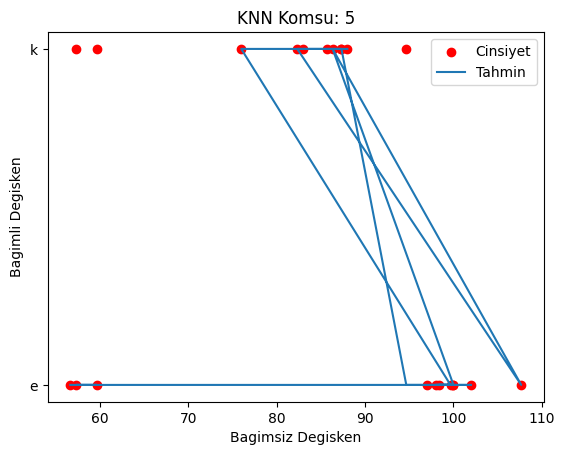

In [214]:
# 5 komsulu verinin goruntusune bak 
plt.scatter(X_row,Y,color='red',label='Cinsiyet')
plt.plot(X_row,knn5.predict(X_row),label='Tahmin')
plt.title('KNN Komsu: 5')
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.legend()
plt.show()

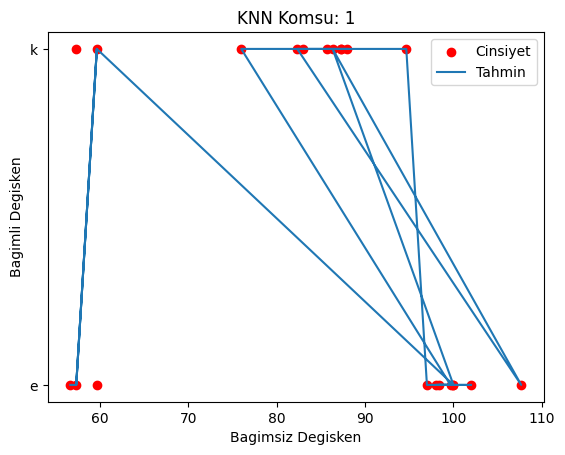

In [215]:
# 1 komsulu verinin goruntusune bak
plt.scatter(X_row,Y,color='red',label='Cinsiyet')
plt.plot(X_row,knn1.predict(X_row),label='Tahmin')
plt.title('KNN Komsu: 1')
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.legend()
plt.show()